In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("data",one_hot = True)

mnist = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 46s 4us/step


In [2]:
#MNIST ile El yazısı için derin öğrenme uygulaması

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.models import Sequential

In [8]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

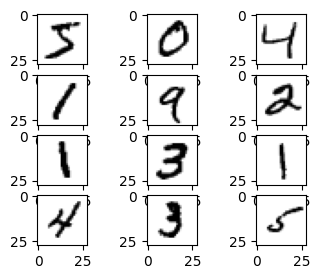

In [10]:
plt.figure(figsize=(4,3))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
plt.show()

In [11]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [20]:
#Modelin Kurulması
input_shape = (28,28,1)

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))


In [21]:
model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
#pip install pydot

Could not fetch URL https://pypi.org/simple/pydot/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pydot/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)'))) - skipping

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pydot (from versions: none)
ERROR: No matching distribution found for pydot


In [24]:
tf.keras.utils.plot_model(model,'mnist-ibbeco.pg',
                          show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
history = model.fit(
    X_train,
    y_train,
    verbose=2, # çıktının çizim hali 0 olunca hiç bir şey yazmıyor, 1 yazınca oklu olarak yazıyor
    epochs=5,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/5
3000/3000 - 21s - loss: 0.3656 - accuracy: 0.8867 - val_loss: 0.1234 - val_accuracy: 0.9632 - 21s/epoch - 7ms/step
Epoch 2/5
3000/3000 - 20s - loss: 0.1849 - accuracy: 0.9450 - val_loss: 0.0890 - val_accuracy: 0.9747 - 20s/epoch - 7ms/step
Epoch 3/5
3000/3000 - 21s - loss: 0.1455 - accuracy: 0.9560 - val_loss: 0.0711 - val_accuracy: 0.9809 - 21s/epoch - 7ms/step
Epoch 4/5
3000/3000 - 25s - loss: 0.1201 - accuracy: 0.9629 - val_loss: 0.0722 - val_accuracy: 0.9799 - 25s/epoch - 8ms/step
Epoch 5/5
3000/3000 - 21s - loss: 0.1057 - accuracy: 0.9669 - val_loss: 0.0798 - val_accuracy: 0.9783 - 21s/epoch - 7ms/step


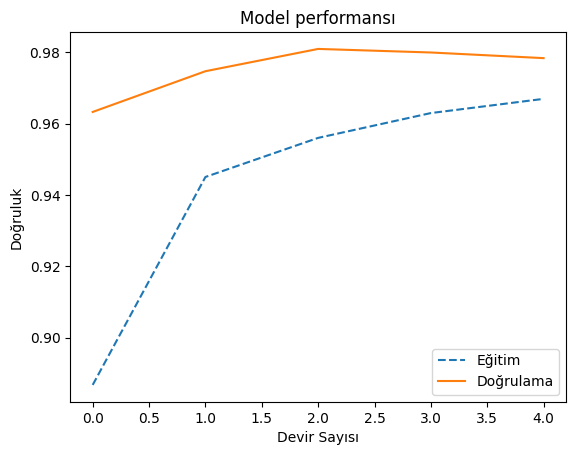

In [31]:
plt.plot(history.history['accuracy'],'--')
plt.plot(history.history['val_accuracy'])
plt.title('Model performansı')
plt.xlabel('Devir Sayısı')
plt.ylabel('Doğruluk')
plt.legend(['Eğitim','Doğrulama'],loc='lower right')
plt.show()

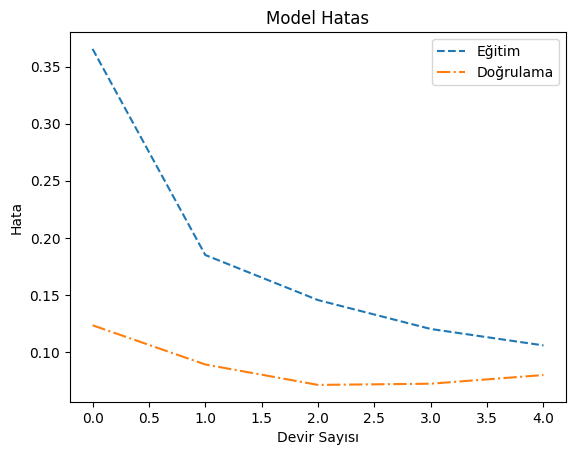

In [33]:
plt.plot(history.history['loss'],'--')
plt.plot(history.history['val_loss'],'-.')
plt.title('Model Hatas')
plt.xlabel('Devir Sayısı')
plt.ylabel('Hata')
plt.legend(['Eğitim','Doğrulama'],loc='upper right')
plt.show()

In [34]:
#evaulate
performans = model.evaluate(X_test,y_test,verbose=0)
print('Modelin test performansı: %.2f%%' % (performans[1]*100))

Modelin test performansı: 97.96%
